# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key  + "&units=imperial" + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=faf1cf6cae1a0fd2f41fb1b4b2679057&units=imperial&q=


In [4]:
count = 0
city_name = []
clouds = []
latitude = []
max_temp = []
long = []
country = []
humidity = []
wind_speed = []
date = []

# Loop through each city
for city in cities:
    city_url = query_url + city
    try:
        response = requests.get(city_url).json()
        #pprint(response)
        count+= 1       
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])

        print(f"{city} found! this is city number {count}")
        
        
    # Handle exceptions for cities not found. 
    except:
        # Append null values
        print("Missing Information, skipping this city")
        pass

jamestown found! this is city number 1
coahuayana found! this is city number 2
bairiki found! this is city number 3
barranca found! this is city number 4
ovalle found! this is city number 5
faanui found! this is city number 6
hilo found! this is city number 7
naze found! this is city number 8
atuona found! this is city number 9
ancud found! this is city number 10
saint george found! this is city number 11
tiksi found! this is city number 12
cooma found! this is city number 13
norman wells found! this is city number 14
upernavik found! this is city number 15
ushuaia found! this is city number 16
thompson found! this is city number 17
port hardy found! this is city number 18
mizdah found! this is city number 19
Missing Information, skipping this city
neuquen found! this is city number 21
san quintin found! this is city number 22
yumen found! this is city number 23
hermanus found! this is city number 24
arraial do cabo found! this is city number 25
lasa found! this is city number 26
chers

perevolotskiy found! this is city number 209
iranshahr found! this is city number 210
turukhansk found! this is city number 211
port elizabeth found! this is city number 212
Missing Information, skipping this city
hamilton found! this is city number 214
tasiilaq found! this is city number 215
Missing Information, skipping this city
north branch found! this is city number 217
patitirion found! this is city number 218
gornorechenskiy found! this is city number 219
puerto ayora found! this is city number 220
alofi found! this is city number 221
alyangula found! this is city number 222
provideniya found! this is city number 223
tezu found! this is city number 224
tuktoyaktuk found! this is city number 225
barrow found! this is city number 226
chaohu found! this is city number 227
mar del plata found! this is city number 228
kulunda found! this is city number 229
nuuk found! this is city number 230
biltine found! this is city number 231
srednekolymsk found! this is city number 232
marsa mat

faya found! this is city number 411
margate found! this is city number 412
impfondo found! this is city number 413
novobirilyussy found! this is city number 414
gotsu found! this is city number 415
Missing Information, skipping this city
zeya found! this is city number 417
sefophe found! this is city number 418
henties bay found! this is city number 419
Missing Information, skipping this city
boyolangu found! this is city number 421
las tunas found! this is city number 422
pierre found! this is city number 423
banjar found! this is city number 424
biak found! this is city number 425
swellendam found! this is city number 426
asau found! this is city number 427
husavik found! this is city number 428
Missing Information, skipping this city
vao found! this is city number 430
asfi found! this is city number 431
makakilo city found! this is city number 432
nhulunbuy found! this is city number 433
abonnema found! this is city number 434
chokwe found! this is city number 435
lebu found! this i

mwinilunga found! this is city number 617
wanaka found! this is city number 618
springbok found! this is city number 619
tautira found! this is city number 620
Missing Information, skipping this city
roebourne found! this is city number 622
cortez found! this is city number 623
tamandare found! this is city number 624
Missing Information, skipping this city
sanming found! this is city number 626


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_df = pd.DataFrame({
    'City': city_name,
    'Cloudiness': clouds,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': latitude,
    'Lng': long,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
})
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1586536465,76,42.10,-79.24,35.01,23.04
1,Coahuayana Viejo,5,MX,1586536775,30,18.73,-103.68,86.00,11.41
2,Bairiki Village,20,KI,1586536676,83,1.33,172.98,82.40,5.82
3,Barranca,62,PE,1586536616,65,-10.75,-77.77,78.26,9.42
4,Ovalle,43,CL,1586536775,43,-30.60,-71.20,75.67,8.08


In [6]:
city_weather_df.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

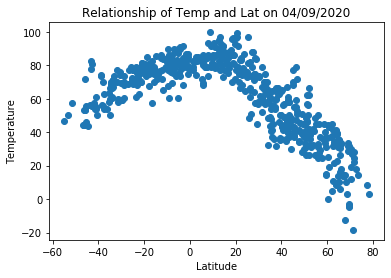

In [7]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Relationship of Temp and Lat on 04/09/2020')
plt.show()

#### Latitude vs. Humidity Plot

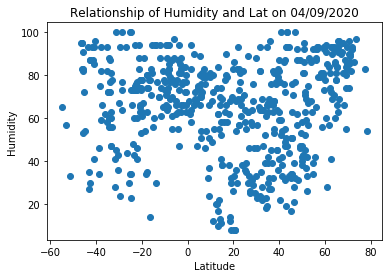

In [8]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Relationship of Humidity and Lat on 04/09/2020')
plt.show()

#### Latitude vs. Cloudiness Plot

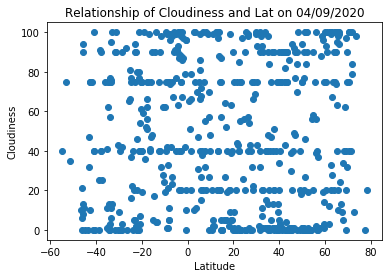

In [9]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Relationship of Cloudiness and Lat on 04/09/2020')
plt.show()

#### Latitude vs. Wind Speed Plot

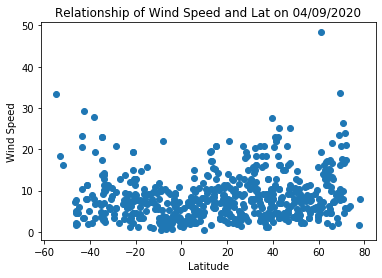

In [10]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Relationship of Wind Speed and Lat on 04/09/2020')
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots 
 
def linear_regression(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere (greater than or equal to 0 degrees latitude):
northern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,90,US,1586536465,76,42.10,-79.24,35.01,23.04
1,Coahuayana Viejo,5,MX,1586536775,30,18.73,-103.68,86.00,11.41
2,Bairiki Village,20,KI,1586536676,83,1.33,172.98,82.40,5.82
6,Hilo,90,US,1586536776,83,19.73,-155.09,71.60,2.51
7,Naze,22,JP,1586536776,76,28.37,129.48,57.20,3.36


In [14]:
#and Southern Hemisphere (less than 0 degrees latitude):
southern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] <= 0)]
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,Barranca,62,PE,1586536616,65,-10.75,-77.77,78.26,9.42
4,Ovalle,43,CL,1586536775,43,-30.60,-71.20,75.67,8.08
5,Faanui,41,PF,1586536775,78,-16.48,-151.75,82.49,10.36
8,Atuona,19,PF,1586536776,77,-9.80,-139.03,81.95,11.95
9,Ancud,75,CL,1586536596,93,-41.87,-73.82,57.20,8.05


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

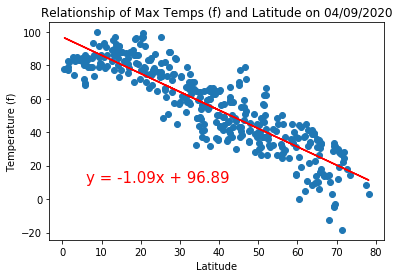

In [15]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Temperature (f)"
title = "Relationship of Max Temps (f) and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

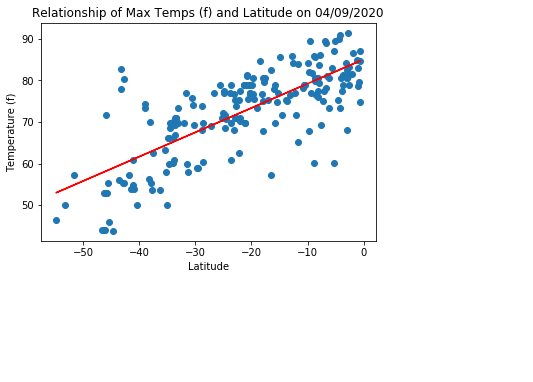

In [16]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Temperature (f)"
title = "Relationship of Max Temps (f) and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

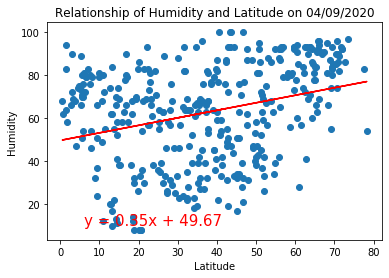

In [17]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
title = "Relationship of Humidity and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

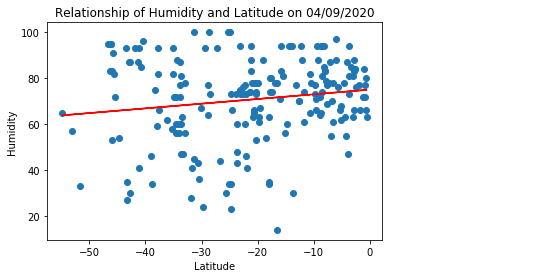

In [18]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
title = "Relationship of Humidity and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

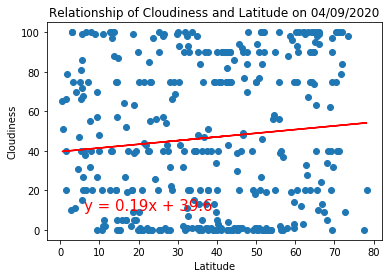

In [19]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
title = "Relationship of Cloudiness and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

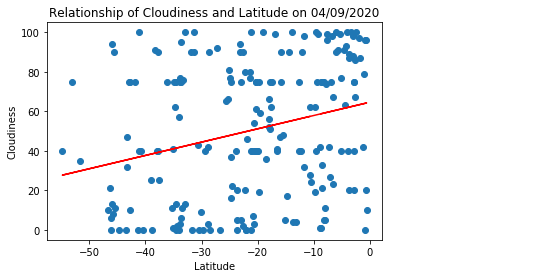

In [20]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
title = "Relationship of Cloudiness and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

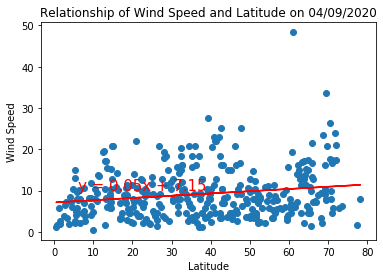

In [21]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
title = "Relationship of Wind Speed and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

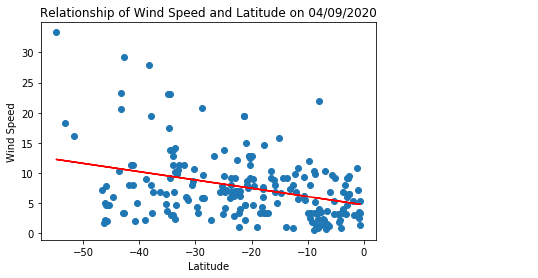

In [22]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
title = "Relationship of Wind Speed and Latitude on 04/09/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)